In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Preparing Data

In [221]:
df = pd.read_csv(f'weatherkit_plus_load.csv')
colors = sns.color_palette()

In [222]:
#setting the dataframe index to timestampt
df = df.set_index('event_timestamp')

In [223]:
#converting object type to datetime
df.index = pd.to_datetime(df.index)

In [224]:
#Removing the initial text from column name
df.columns = df.columns.str.strip('weatherkit_')

In [225]:
ar_df = df.copy()

In [226]:
df.head(10)

,observed_temperature_C,observed_humidity_pc,observed_air_pressure_kP,observed_cloud_cover_pc,observed_wind_direction_deg,observed_wind_speed_km,forecast_temp_C,forecast_humidity_pc,forecast_air_pressure_kP,forecast_cloud_cover_pc,forecast_wind_direction_deg,forecast_wind_speed_km,load_MW
event_timestamp,,,,,,,,,,,,,
2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088
2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132
2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780
2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308
2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376
2023-02-11 01:45:00+05:30,21.66,71.0,101.313,0.0,10.0,7.07,21.35,73.0,101.334,0.0,6.0,7.37,242.830688
2023-02-11 02:00:00+05:30,21.53,71.0,101.304,0.0,12.0,7.06,21.35,73.0,101.334,0.0,6.0,7.37,240.197572
2023-02-11 02:15:00+05:30,21.39,71.0,101.295,0.0,13.0,7.06,21.35,73.0,101.334,0.0,6.0,7.37,238.021056
2023-02-11 02:30:00+05:30,21.25,72.0,101.287,0.0,15.0,7.04,20.86,74.0,101.292,0.0,14.0,7.33,236.483380


In [227]:
#Checking for any missing values
print(len(df))
print(df.isnull().values.sum())
df.describe()

14298
0


,observed_temperature_C,observed_humidity_pc,observed_air_pressure_kP,observed_cloud_cover_pc,observed_wind_direction_deg,observed_wind_speed_km,forecast_temp_C,forecast_humidity_pc,forecast_air_pressure_kP,forecast_cloud_cover_pc,forecast_wind_direction_deg,forecast_wind_speed_km,load_MW
count,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000,14298.000000
mean,28.877266,67.243768,100.902437,33.470323,218.261505,11.394937,28.810426,67.022262,100.893322,32.690287,217.872849,11.474569,372.500217
std,3.480119,16.161825,0.321955,30.138515,106.989811,6.103925,3.479793,16.255389,0.315788,29.219298,105.033661,6.068993,88.323996
min,18.470000,21.000000,99.866000,0.000000,0.000000,1.730000,18.100000,20.000000,99.964000,0.000000,0.000000,1.450000,214.677424
25%,26.530000,56.999000,100.681000,9.000000,173.000000,6.270000,26.440000,56.999000,100.676000,10.000000,171.000000,6.360000,301.146656
50%,28.740000,70.000000,100.915500,24.000000,251.000000,9.970000,28.640000,70.000000,100.907000,24.000000,249.000000,10.180000,356.875968
75%,31.410000,80.000000,101.117000,52.000000,297.000000,16.040000,31.350000,80.000000,101.108000,48.000000,295.000000,16.340000,439.639653
max,38.390000,95.000000,101.760000,99.000000,359.000000,35.200000,37.580000,95.000000,101.713000,99.000000,359.000000,32.990000,1543.524320


# Data Analysis and Feature Engineering

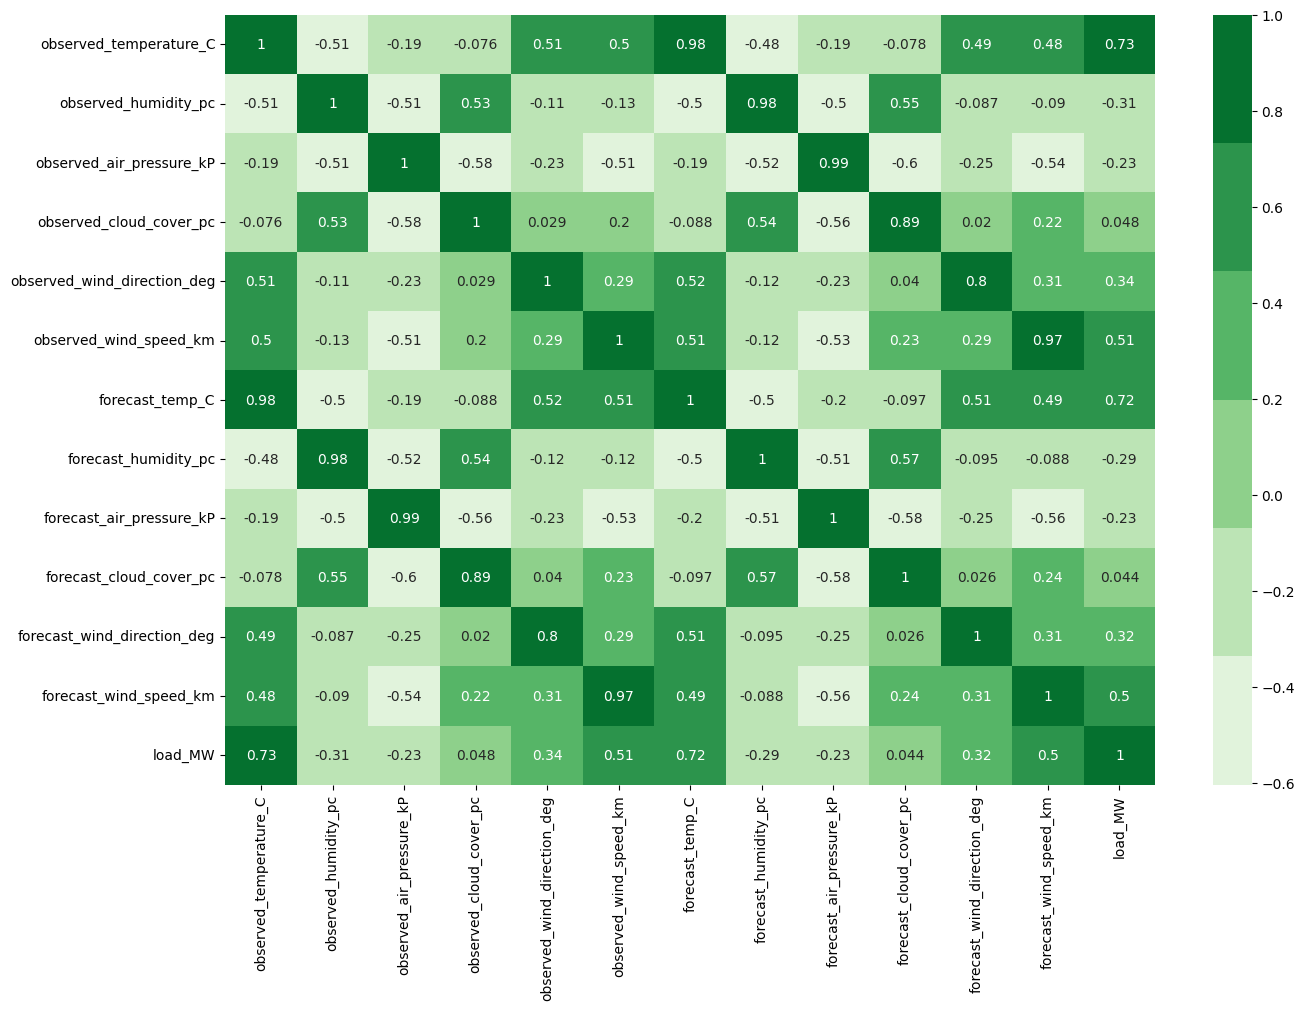

In [228]:
#correlation between features
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, annot=True, cmap=sns.color_palette('Greens'))

The heatmap shows minimal correlation between the target and cloud cover.  
The key attributes are temperature and windspeed.  
There is also a high correlation between the observed values and the forecasted.

In [229]:
#Only using forecasted values and not observed and dropping cloud_cover
cols = list(df.columns)
df = df[cols[6:]]
df.drop(['forecast_cloud_cover_pc'], axis=1, inplace=True)
lstm_df = df.copy()

In [230]:
#Adding Load from 48 hours ago and 7 days ago (same day) at the same time
df['PrevDay'] = df['load_MW'].shift(freq='2D')
df['PrevWeek'] = df['load_MW'].shift(freq='7D')
df.dropna(inplace=True)

In [231]:
df.isnull().any().any()

False

<Axes: title={'center': 'Load'}, xlabel='event_timestamp'>

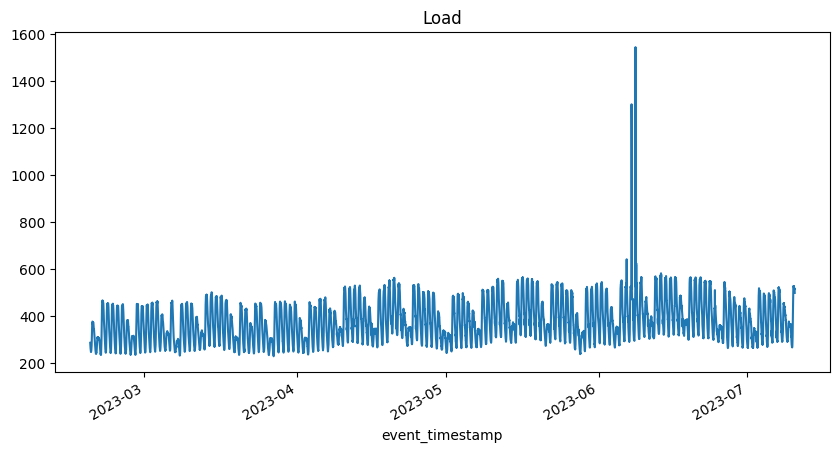

In [232]:
#Visualizing the target variable
df['load_MW'].plot(color=colors[0], figsize=(10,5), title='Load')

Seasonality is observed with repeating patterns  
Further exploring days and weeks.

<Axes: title={'center': 'Load for one day'}, xlabel='event_timestamp'>

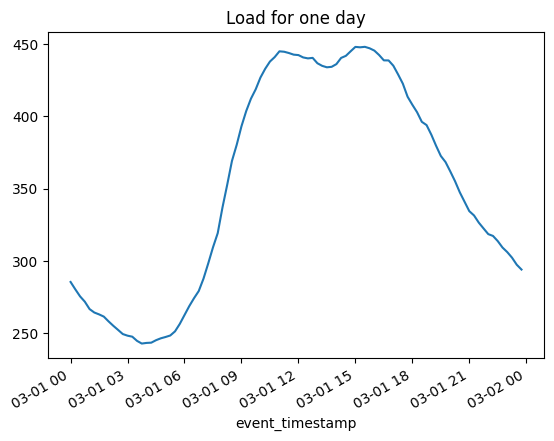

In [233]:
day = df.loc[(df.index >= '2023-03-01 00:00:00+5:30') & (df.index < '2023-03-02 00:00:00+5:30'), 'load_MW']
day.plot(title='Load for one day')

<Axes: title={'center': 'Load for two weeks'}, xlabel='event_timestamp'>

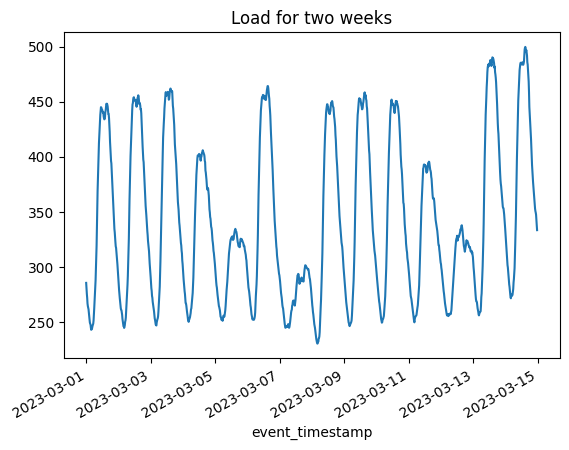

In [234]:
week = df.loc[(df.index >= '2023-03-01 00:00:00+5:30') & (df.index < '2023-03-15 00:00:00+5:30'), 'load_MW']
week.plot(title='Load for two weeks')

Day of the week and Hour of the day seem to have effect on the load

In [235]:
#Creating new features
df['Hour'] = df.index.hour
df['Day'] = df.index.dayofweek

# Model Selection

In [236]:
X = df.drop(['load_MW'], axis=1)
y = df['load_MW']

In [237]:
#Train-Test Split
train_size = int(0.8*len(df))
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

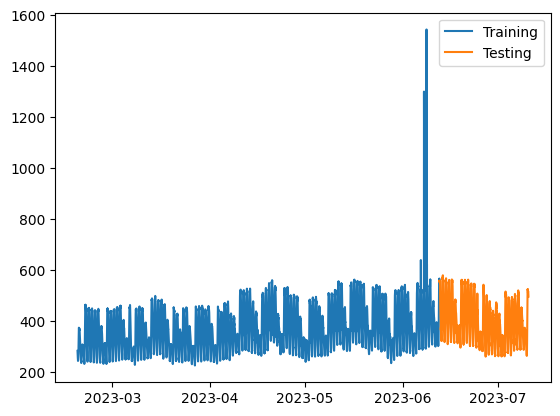

In [238]:
fig, ax = plt.subplots()
train = ax.plot(y_train, label='Training')
test = ax.plot(y_test, label='Testing')
plt.legend()
plt.show()

### Using Regression for Predictions

In [239]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [240]:
model = xgb.XGBRegressor(n_estimators=500, early_stopping_rounds=100, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
preds = model.predict(X_test)
mse_score = mean_squared_error(preds, y_test)
mape_score = mean_absolute_percentage_error(preds, y_test)

[0]	validation_0-rmse:86.97643	validation_1-rmse:91.52750
[100]	validation_0-rmse:39.69265	validation_1-rmse:45.93821
[200]	validation_0-rmse:24.26865	validation_1-rmse:34.40357
[300]	validation_0-rmse:18.83555	validation_1-rmse:32.41467
[400]	validation_0-rmse:15.96740	validation_1-rmse:32.68325
[449]	validation_0-rmse:14.97695	validation_1-rmse:32.46987


In [241]:
print('Mean Squared Error: ', mse_score)
print("RMSE: ", np.sqrt(mse_score))

Mean Squared Error:  1021.7605679803081
RMSE:  31.964989722825003


In [242]:
print('Mean Absolute Percentage Error: ', mape_score)

Mean Absolute Percentage Error:  0.06228469772452729


Feature Importance Analysis

In [243]:
importances = dict(zip(model.feature_names_in_,model.feature_importances_))
imps = df.from_dict(importances, orient='index', columns=['Score'])

In [244]:
imps.sort_values(['Score'])

,Score
forecast_wind_speed_km,0.013267
forecast_air_pressure_kP,0.013661
forecast_wind_direction_deg,0.013734
forecast_humidity_pc,0.020656
Hour,0.025629
Day,0.031125
forecast_temp_C,0.045372
PrevDay,0.091472
PrevWeek,0.745084


Plotting Predicted vs. Real Values

In [245]:
x = np.arange(len(preds))

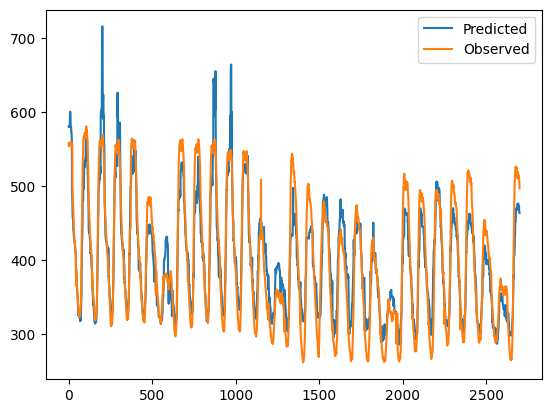

In [246]:
fig, ax = plt.subplots()
ax.plot(x, preds, label='Predicted')
ax.plot(x, y_test, label='Observed')
plt.legend()
plt.show()

# Using LSTMs for Predictions

In [247]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [248]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)

In [249]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Data Preparation

In [250]:
#Train-Test Split and scaling
scaler = MinMaxScaler()
train_size = int(0.8*len(lstm_df))
train_df = lstm_df.iloc[:train_size]
test_df = lstm_df.iloc[train_size:]
train_df = scaler.fit_transform(train_df)
test_df = scaler.transform(test_df)
X_train = train_df[:,:-1]
y_train = train_df[:,-1]
X_test = test_df[:,:-1]
y_test = test_df[:, -1]


In [251]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11438, 5)
(2860, 5)
(11438,)
(2860,)


In [252]:
#Creating Sequences for the Model
window = 160 #To generate next day load plus today's load after 8:00AM
X, y = [], []
for i in range(len(X_train) - (window*2)):
    X.append(X_train[i:i+window])
    y.append(y_train[i+window:i+window+window])

Xt, yt = [], []
for i in range(len(X_test) - (window*2)):
    Xt.append(X_test[i:i+window])
    yt.append(y_test[i+window:i+window+window])
X = torch.tensor(np.array(X), dtype=torch.float32)
y = torch.tensor(np.array(y), dtype=torch.float32)
Xt = torch.tensor(np.array(Xt), dtype=torch.float32)
yt = torch.tensor(np.array(yt), dtype=torch.float32)
print(X.shape, y.shape)
print(Xt.shape, yt.shape)

torch.Size([11118, 160, 5]) torch.Size([11118, 160])
torch.Size([2540, 160, 5]) torch.Size([2540, 160])


In [253]:
#Preparing the torch dataset
train_dataset = TensorDataset(X, y)
test_dataset = TensorDataset(Xt, yt)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [254]:
len(train_dataset)

11118

Defining Model

In [255]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=5, num_layers=5, hidden_size=128, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(128, 160)
    def forward(self, x):
        x, (hstate, cstate) = self.lstm(x)
        out = self.fc(x[:,-1,:])
        return out

In [256]:
model = LSTM()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)
epochs = 50

Training the model

In [257]:
train_loss, test_loss = [], []
for epoch in tqdm(range(epochs), leave=True):
    running_loss = 0.0
    model.train()
    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item() * X.shape[0]
    train_loss.append(running_loss)
    print('Training Loss: {}'.format(running_loss))
    model.eval()
    with torch.no_grad():
        running_loss = 0.0
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            preds = model(X)
            loss = criterion(preds, y)
            running_loss += loss.item() * X.shape[0]
        scheduler.step(running_loss)
        test_loss.append(running_loss)
        print('Validation Loss: {}'.format(running_loss))

  0%|          | 0/50 [00:00<?, ?it/s]

Training Loss: 32.18370458111167
Validation Loss: 7.969181011430919


  2%|▏         | 1/50 [00:02<02:07,  2.59s/it]

Training Loss: 16.37106938380748


  4%|▍         | 2/50 [00:05<02:02,  2.55s/it]

Validation Loss: 4.482702896464616
Training Loss: 15.162106369622052


  6%|▌         | 3/50 [00:07<01:58,  2.53s/it]

Validation Loss: 3.9040145901963115
Training Loss: 14.740627679042518
Validation Loss: 2.92155948234722


  8%|▊         | 4/50 [00:10<01:56,  2.53s/it]

Training Loss: 14.339255759259686
Validation Loss: 4.222127666696906


 10%|█         | 5/50 [00:12<01:51,  2.49s/it]

Training Loss: 13.978855433873832
Validation Loss: 10.970832550898194


 12%|█▏        | 6/50 [00:15<01:49,  2.49s/it]

Training Loss: 15.974924517329782


 14%|█▍        | 7/50 [00:17<01:46,  2.48s/it]

Validation Loss: 5.816897688433528


 16%|█▌        | 8/50 [00:19<01:44,  2.48s/it]

Training Loss: 13.952152706449851
Validation Loss: 7.180520554073155
Training Loss: 13.568041767692193
Validation Loss: 6.9125897800549865


 18%|█▊        | 9/50 [00:22<01:41,  2.48s/it]

Training Loss: 12.975478172535077


 20%|██        | 10/50 [00:24<01:39,  2.48s/it]

Validation Loss: 14.806182768195868
Training Loss: 10.980083305970766
Validation Loss: 11.51020042784512


 22%|██▏       | 11/50 [00:27<01:36,  2.49s/it]

Training Loss: 10.197058491874486
Validation Loss: 12.256948447786272


 24%|██▍       | 12/50 [00:29<01:34,  2.48s/it]

Training Loss: 9.987165322294459


 26%|██▌       | 13/50 [00:32<01:31,  2.48s/it]

Validation Loss: 9.849602170288563
Training Loss: 9.551381251541898
Validation Loss: 9.086330478079617


 28%|██▊       | 14/50 [00:35<01:30,  2.52s/it]

Training Loss: 9.160970125114545
Validation Loss: 9.700975640211254


 30%|███       | 15/50 [00:37<01:28,  2.52s/it]

Training Loss: 8.922215526457876
Validation Loss: 9.75633558537811


 32%|███▏      | 16/50 [00:39<01:25,  2.50s/it]

Training Loss: 8.15891235822346


 34%|███▍      | 17/50 [00:42<01:22,  2.49s/it]

Validation Loss: 11.566053843125701
Training Loss: 7.990531525108963
Validation Loss: 12.686131820082664


 36%|███▌      | 18/50 [00:44<01:19,  2.47s/it]

Training Loss: 7.935273206967395


 38%|███▊      | 19/50 [00:47<01:16,  2.46s/it]

Validation Loss: 12.04292513243854
Training Loss: 7.8514492330141366
Validation Loss: 13.273861952126026


 40%|████      | 20/50 [00:49<01:13,  2.45s/it]

Training Loss: 7.807906455476768
Validation Loss: 13.290196005254984


 42%|████▏     | 21/50 [00:52<01:10,  2.44s/it]

Training Loss: 7.782734022475779
Validation Loss: 13.260696051642299


 44%|████▍     | 22/50 [00:54<01:08,  2.43s/it]

Training Loss: 7.691600443795323
Validation Loss: 13.364463187754154


 46%|████▌     | 23/50 [00:57<01:05,  2.44s/it]

Training Loss: 7.67468366981484
Validation Loss: 13.442739222198725


 48%|████▊     | 24/50 [00:59<01:03,  2.43s/it]

Training Loss: 7.688384668086655
Validation Loss: 13.321386564522982


 50%|█████     | 25/50 [01:01<01:00,  2.43s/it]

Training Loss: 7.680731116095558
Validation Loss: 13.318822780624032


 52%|█████▏    | 26/50 [01:04<00:58,  2.43s/it]

Training Loss: 7.677528681582771


 54%|█████▍    | 27/50 [01:06<00:56,  2.47s/it]

Validation Loss: 13.418518781661987
Training Loss: 7.670953485649079


 56%|█████▌    | 28/50 [01:09<00:55,  2.50s/it]

Validation Loss: 13.493447242304683
Training Loss: 7.643521039513871


 58%|█████▊    | 29/50 [01:12<00:53,  2.53s/it]

Validation Loss: 13.496474612504244
Training Loss: 7.671460691315588


 60%|██████    | 30/50 [01:14<00:51,  2.55s/it]

Validation Loss: 13.48932939581573
Training Loss: 7.649949962506071


 62%|██████▏   | 31/50 [01:17<00:48,  2.55s/it]

Validation Loss: 13.500449165701866


 64%|██████▍   | 32/50 [01:19<00:45,  2.52s/it]

Training Loss: 7.669310253870208
Validation Loss: 13.50618070550263
Training Loss: 7.676977365277708


 66%|██████▌   | 33/50 [01:22<00:42,  2.51s/it]

Validation Loss: 13.492354473099113
Training Loss: 7.656793855596334


 68%|██████▊   | 34/50 [01:24<00:40,  2.51s/it]

Validation Loss: 13.487852526828647
Training Loss: 7.6662618881091475


 70%|███████   | 35/50 [01:27<00:37,  2.51s/it]

Validation Loss: 13.487472401931882
Training Loss: 7.6330479418393224


 72%|███████▏  | 36/50 [01:29<00:35,  2.50s/it]

Validation Loss: 13.488756451755762
Training Loss: 7.64023696287768


 74%|███████▍  | 37/50 [01:32<00:32,  2.50s/it]

Validation Loss: 13.48777486383915
Training Loss: 7.661811189958826


 76%|███████▌  | 38/50 [01:34<00:30,  2.52s/it]

Validation Loss: 13.487390525639057
Training Loss: 7.670683922828175


 78%|███████▊  | 39/50 [01:37<00:28,  2.55s/it]

Validation Loss: 13.488059353083372
Training Loss: 7.640859729028307


 80%|████████  | 40/50 [01:39<00:25,  2.57s/it]

Validation Loss: 13.48700999841094
Training Loss: 7.6595154866809025


 82%|████████▏ | 41/50 [01:42<00:22,  2.55s/it]

Validation Loss: 13.486683936789632
Training Loss: 7.647049237508327


 84%|████████▍ | 42/50 [01:45<00:20,  2.56s/it]

Validation Loss: 13.485176432877779
Training Loss: 7.662474145821761
Validation Loss: 13.486156774684787


 86%|████████▌ | 43/50 [01:47<00:17,  2.56s/it]

Training Loss: 7.639444323081989


 88%|████████▊ | 44/50 [01:50<00:15,  2.55s/it]

Validation Loss: 13.48763545230031
Training Loss: 7.6538007776252925


 90%|█████████ | 45/50 [01:52<00:12,  2.54s/it]

Validation Loss: 13.48889772221446
Training Loss: 7.673209181986749


 92%|█████████▏| 46/50 [01:55<00:10,  2.56s/it]

Validation Loss: 13.488596674054861
Training Loss: 7.656917916610837


 94%|█████████▍| 47/50 [01:57<00:07,  2.56s/it]

Validation Loss: 13.489116979762912
Training Loss: 7.656684789806604


 96%|█████████▌| 48/50 [02:00<00:05,  2.55s/it]

Validation Loss: 13.488160975277424
Training Loss: 7.665403228835203


 98%|█████████▊| 49/50 [02:02<00:02,  2.53s/it]

Validation Loss: 13.487199869006872
Training Loss: 7.657624938990921


100%|██████████| 50/50 [02:05<00:00,  2.51s/it]

Validation Loss: 13.48834814876318


Making Predictions on the test set

In [258]:
predicted, observed = [], []
model.eval()
with torch.no_grad():
    for i in range(0, len(Xt), 160):
        sequence = Xt[i].unsqueeze(0).to(device)            #Changing 2D to 3D for LSTM
        preds = model(sequence).cpu().numpy().flatten()
        predicted.append(preds)
        observed.append(yt[i].cpu().numpy().flatten())


In [259]:
#Inverting the scaler to get the real values
predicted = np.array(predicted).flatten()
observed = np.array(observed).flatten()
dummy = np.zeros((predicted.shape[0], Xt.shape[2])) #Dummy columns to match the shape for the scaler
print(dummy.shape)
predicted = scaler.inverse_transform(np.concatenate([dummy, predicted.reshape(-1,1)], axis=1))
observed = scaler.inverse_transform(np.concatenate([dummy, observed.reshape(-1,1)], axis=1))

(2560, 5)


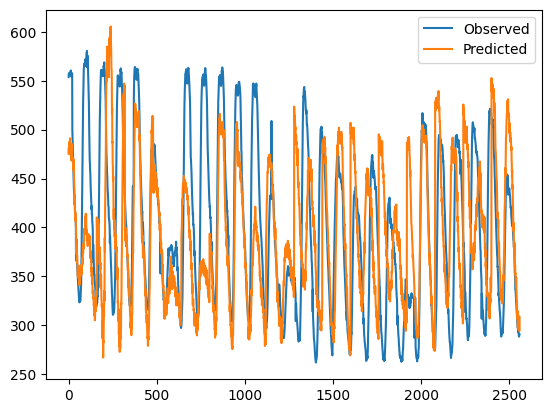

In [260]:
fig, ax = plt.subplots()
ax.plot(observed[:,-1], label='Observed')
ax.plot(predicted[:,-1], label='Predicted')
plt.legend()
plt.show()

### Using ARIMA for Time-Series Forecasting

In [261]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima

In [262]:
#Skipping the first day as it did not have values starting from 00:00:00
timeseries = ar_df.loc[(ar_df.index >= '2023-02-12'), 'load_MW']

In [263]:
#Checking for stationarity using the ADF Test
results = adfuller(timeseries)
print('ADF: ', results[0])
print('P-value: ', results[1]) #The p-value is very small, i.e., smaller than 5% so no stationarity

ADF:  -16.216433776870876
P-value:  3.938121056311996e-29


In [264]:
timeseries
train_size = int(0.8*len(timeseries))
train = timeseries.iloc[:train_size]
test = timeseries.iloc[train_size:]

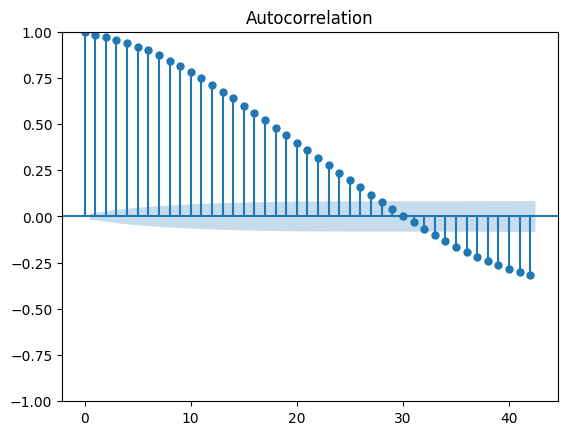

In [265]:
acf = plot_acf(timeseries) #Shows gradual decay and no sharp cut-off

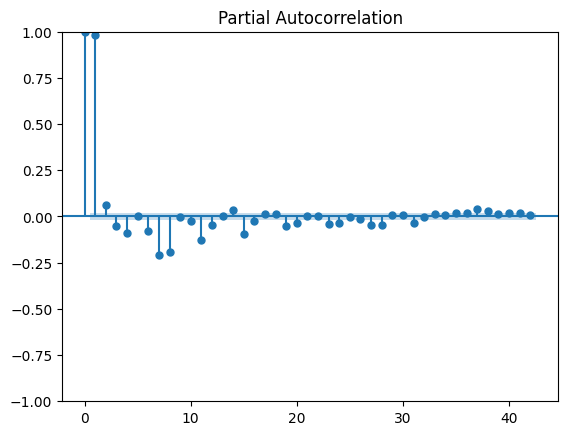

In [266]:
pacf = plot_pacf(timeseries) #Shows a strong cutoff after 2

Automatically finding the best model parameters for ARIMA was not feasible

In [267]:
#params = pmdarima.auto_arima(train, d=0, stepwise=True, trace=True, max_order=6, suppress_warnings=True)

In [268]:
%%capture
#Using an autoregressive based model based on the previous plots
model = ARIMA(train, order=(5,1,1))
result = model.fit()

In [269]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                load_MW   No. Observations:                11363
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -48202.814
Date:                Thu, 06 Mar 2025   AIC                          96419.629
Time:                        06:43:43   BIC                          96470.995
Sample:                             0   HQIC                         96436.906
                              - 11363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6435      0.006    107.593      0.000       0.632       0.655
ar.L2          0.0816      0.001     70.180      0.000       0.079       0.084
ar.L3          0.0325      0.002     15.970      0.0